# Linear Regression from Scratch

In this notebook, we will implement linear regression using custom Python code. We will cover the following steps:

- Generating synthetic data
- Visualizing the data
- Implementing the linear regression algorithm
- Training the model
- Evaluating the results

Let's get started!

In [2]:
#import the module
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#generate random data
torch.manual_seed(0)
#random uniform distribution fallowing the monte carlo method
x_rand = torch.rand(100) * 6 - 3
x_rand = x_rand.unsqueeze(1)
y_rand = 2*x_rand + torch.randn(x_rand.shape)*0.9
print(x_rand.shape, y_rand.shape)

torch.Size([100, 1]) torch.Size([100, 1])


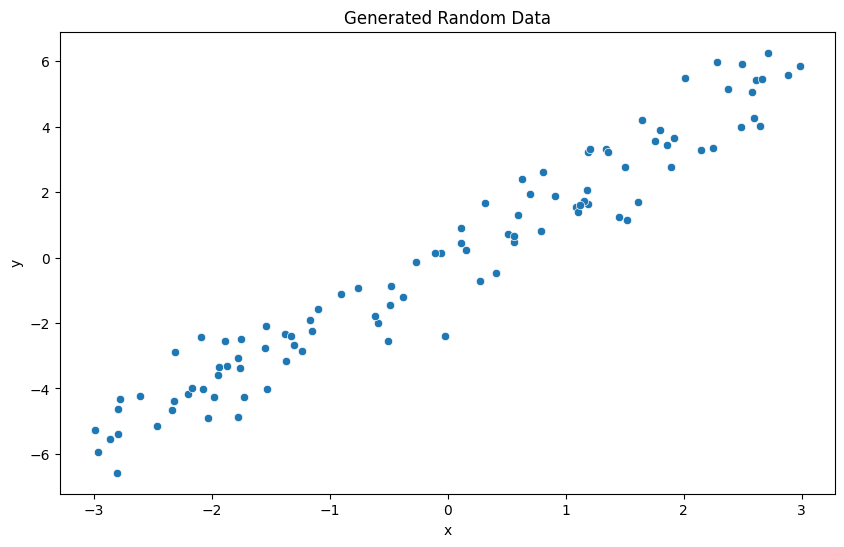

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy())
plt.title('Generated Random Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Basic math
y_pred = m*x_rand + c
so we need m and c to generate, first let's calculate randomly and backpropagation willl handle it
mean squared error
((y_pred - y_rand)**2).mean()



Epoch 0, Loss: 15.716687202453613, m: -0.11987628042697906, c: -1.0376003980636597
Epoch 10, Loss: 5.3194899559021, m: 0.8228247165679932, c: -0.8689790964126587
Epoch 20, Loss: 2.2664132118225098, m: 1.3219367265701294, c: -0.7221493721008301
Epoch 30, Loss: 1.3096165657043457, m: 1.5867431163787842, c: -0.5973815321922302
Epoch 40, Loss: 0.9716119170188904, m: 1.7276870012283325, c: -0.4928887188434601
Epoch 50, Loss: 0.8295736908912659, m: 1.803070068359375, c: -0.4061516225337982
Epoch 60, Loss: 0.7579770684242249, m: 1.843684196472168, c: -0.33455222845077515
Epoch 70, Loss: 0.7166200280189514, m: 1.8658043146133423, c: -0.2756560146808624
Epoch 80, Loss: 0.6907880902290344, m: 1.8780430555343628, c: -0.2273174524307251
Epoch 90, Loss: 0.6740281581878662, m: 1.8849653005599976, c: -0.18770073354244232


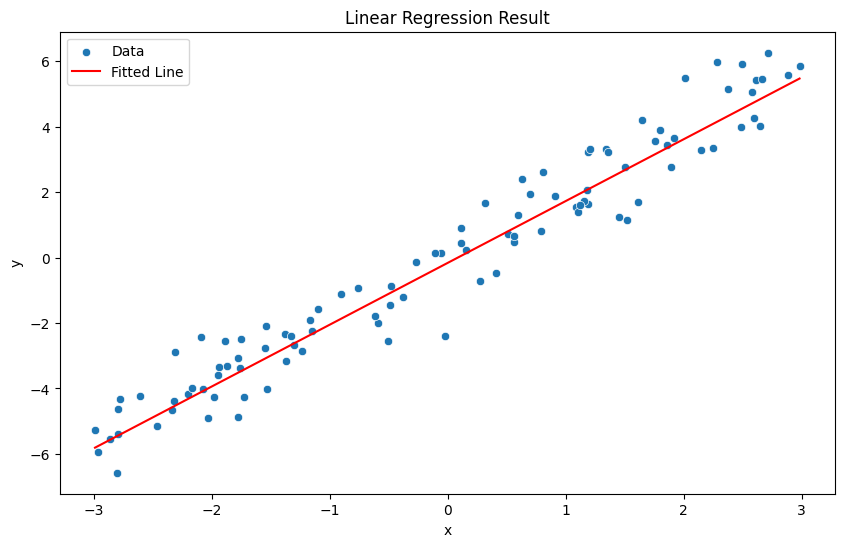

In [13]:
#implementing linear regression
#lets assign initial values for m and c
m = torch.randn(1)
c = torch.randn(1) 


#lets update m and c using the gradients
learning_rate = 0.01  
epochs = 100
for epoch in range(epochs):
    #forward pass
    Y_pred = m * x_rand + c    
    #calculate loss MAE
    #mean squared error



    #mse
    loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
    #rmse
    #loss = torch.sqrt(loss)

    error = Y_pred - y_rand

    #calculate gradients
    m_grad =  (2/len(x_rand))*torch.sum(error*x_rand)
    c_grad = (2/len(x_rand))*torch.sum(error)

    #update m and c
    m =m -  learning_rate * m_grad
    c = c -  learning_rate * c_grad
    #print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, m: {m.item()}, c: {c.item()}')  
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
m = torch.randn(1)
c=  torch.randn(1)
